# Measure brute force performances

In [20]:
import sys
sys.path.append('..')

from src import brute_force
import numpy as np
from time import time
import tracemalloc
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [30]:
problem_sizes = np.arange(4, 36, 2)
problem_Cs = 2*problem_sizes

problems_weights = [np.random.randint(1, C-1, size=n, ) for n, C in zip(problem_sizes, problem_Cs)]
problems_values = [np.random.randint(1, C+1, size=n) for n, C in zip(problem_sizes, problem_Cs)]

In [31]:
times = []
memory = []
max_ram = 40E9

for i in trange(problem_sizes.shape[0]):
    start = time()
    tracemalloc.start()
    brute_force.kp_brute_force(problems_values[i], problems_weights[i], problem_Cs[i], max_ram)
    times.append(time() - start)
    memory.append(tracemalloc.get_traced_memory()[1])
    tracemalloc.stop()

  0%|          | 0/16 [00:00<?, ?it/s]

Number of threads: 15
Max samples: 41666666
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 45.26it/s]


Number of threads: 15
Max samples: 35714285
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


Number of threads: 15
Max samples: 31250000
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 28.07it/s]


Number of threads: 15
Max samples: 27777777
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 42.10it/s]


Number of threads: 15
Max samples: 25000000
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 51.26it/s]


Number of threads: 15
Max samples: 22727272
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 45.04it/s]


Number of threads: 15
Max samples: 20833333
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 30.80it/s]


Number of threads: 15
Max samples: 19230769
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


Number of threads: 15
Max samples: 17857142
Number of steps: 1


100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


Number of threads: 15
Max samples: 16666666
Number of steps: 1


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


Number of threads: 15
Max samples: 15625000
Number of steps: 2


100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


Number of threads: 15
Max samples: 14705882
Number of steps: 5


100%|██████████| 1/1 [00:05<00:00,  5.28s/it]


Number of threads: 15
Max samples: 13888888
Number of steps: 20


100%|██████████| 2/2 [00:12<00:00,  6.24s/it]


Number of threads: 15
Max samples: 13157894
Number of steps: 82


100%|██████████| 6/6 [00:41<00:00,  6.92s/it]


Number of threads: 15
Max samples: 12500000
Number of steps: 344


100%|██████████| 23/23 [02:45<00:00,  7.20s/it]


Number of threads: 15
Max samples: 11904761
Number of steps: 1444


100%|██████████| 97/97 [11:52<00:00,  7.35s/it]


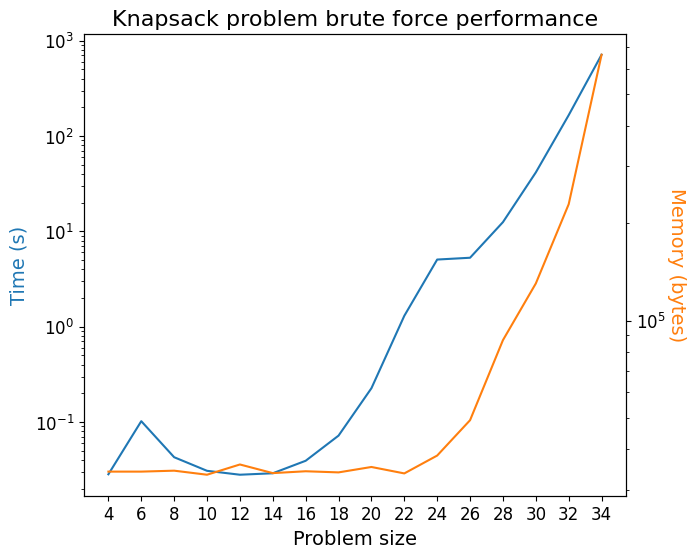

In [38]:
FONTSIZE = 14

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.plot(problem_sizes, times)
ax.set_xticks(problem_sizes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE-2)
ax.set_yscale('log')
ax.set_xlabel('Problem size', fontsize=FONTSIZE)
ax.set_ylabel('Time (s)', color='tab:blue', fontsize=FONTSIZE)
ax.set_title('Knapsack problem brute force performance', fontsize=FONTSIZE+2)
ax2 = ax.twinx()
ax2.plot(problem_sizes, memory, color='tab:orange')
ax2.tick_params(axis='y', which='major', labelsize=FONTSIZE-2)
ax2.set_yscale('log')
ax2.set_ylabel('Memory (bytes)', color='tab:orange', fontsize=FONTSIZE, rotation=270, labelpad=15)
plt.show()

In [39]:
fig.savefig('brute_force_performance.svg')